In [3]:
import keras
from keras.applications import VGG19, InceptionV3
from keras.datasets import mnist

from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
import numpy as np

from keras.layers.convolutional import Conv2D
from keras.engine.topology import InputLayer
from keras.layers.pooling import MaxPooling2D

from keras import backend as K
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D


from attr import attrs, attrib

Using TensorFlow backend.


In [2]:
%load_ext line_profiler

In [17]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [4]:
im_size = (224, 224, 3)

random_img = np.random.uniform(size=im_size)
model_input = keras.layers.Input(shape=im_size)

In [5]:
trained_vgg = VGG19(input_tensor=model_input)
untrained_vgg = VGG19(input_tensor=model_input, weights=None)

KeyboardInterrupt: 

In [6]:
@attrs
class GraphableNeruon(object):
    weights = attrib()
    bias = attrib()
    layer = attrib()
    neuron_number = attrib()
    layer_type = attrib()




In [7]:
def get_neurons(net):
    neurons = []
    for i, layer in enumerate(net.layers):
        if type(layer) is Conv2D:
            wts, bias = layer.get_weights()
            for nn, (w, b) in enumerate(zip(wts.T, bias)):
                neurons.append(GraphableNeruon(w, b, i, nn, layer.get_config()))
    return neurons

In [8]:
def set_neurons(neurons, net):
    last_neuron = neurons[0]
    layer = net.layers[last_neuron.layer]
    layer_weights, layer_bias = layer.get_weights()
    layer_weights = layer_weights.T
    for n in neurons:
        if not last_neuron.layer == n.layer:
            layer.set_weights([layer_weights.T, layer_bias])
            layer = net.layers[n.layer]
            layer_weights, layer_bias = layer.get_weights()
            layer_weights = layer_weights.T
            last_neuron = n
        
        layer_weights[n.neuron_number] = n.weights
        layer_bias[n.neuron_number] = n.bias
        
    
        

In [ ]:
%lprun -f set_neurons set_neurons(get_neurons(trained_vgg), trained_vgg)

In [ ]:
neurons = get_neurons(trained_vgg)

In [ ]:
neurons[:5]

In [ ]:
trained_vgg.layers[1].get_weights()[0].shape

In [ ]:
untrained_vgg.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

untrained_vgg.fit(x_train, y_train, epochs=1, verbose=1, batch_size=32, validation_data=(x_test, y_test))

In [17]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(list(x_train.shape) + [1])
x_test = x_test.reshape(list(x_test.shape) + [1])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, len(set(y_train)))
y_test = keras.utils.to_categorical(y_test, len(set(y_test)))

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28, 28, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

chunk_size = 100
x_chunks = np.split(x_train, len(x_train) // chunk_size)
y_chunks = np.split(y_train, len(y_train) // chunk_size)

neuron_list = []
acc_list = []

for img, cls in zip(x_chunks, y_chunks):
    model.fit(img, cls,
              batch_size=25,
              epochs=1,
              verbose=1,
              validation_data=(x_test, y_test))
    score = model.evaluate(x_test, y_test, verbose=1)
    neuron_list.append(get_neurons(model))
    acc_list.append(score[1])
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])



Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9856/10000 [============================>.] - ETA: 0sTest loss: 2.21623696899
Test accuracy: 0.2495
Train on 100 samples, validate on 10000 samples
Epoch 1/1
10000/10000 [==============================] - 2s     
Test loss: 2.06529358788
Test accuracy: 0.4992
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9856/10000 [============================>.] - ETA: 0sTest loss: 1.87216213474
Test accuracy: 0.635
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9952/10000 [============================>.] - ETA: 0sTest loss: 1.50867934589
Test accuracy: 0.5869
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9856/10000 [============================>.] - ETA: 0sTest loss: 1.26770366325
Test accuracy: 0.6488
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9888/10000 [============================>.] - ETA: 0sTest loss: 1.22882126999
Test accuracy: 0.6162
Train on 100 samples, validate on 10000 sample

 9920/10000 [============================>.] - ETA: 0sTest loss: 0.388688118947
Test accuracy: 0.8794
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9888/10000 [============================>.] - ETA: 0sTest loss: 0.311202207333
Test accuracy: 0.9105
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9984/10000 [============================>.] - ETA: 0sTest loss: 0.327553956413
Test accuracy: 0.9071
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9952/10000 [============================>.] - ETA: 0sTest loss: 0.317456137842
Test accuracy: 0.909
Train on 100 samples, validate on 10000 samples
Epoch 1/1
10000/10000 [==============================] - 2s     
Test loss: 0.306973975274
Test accuracy: 0.9087
Train on 100 samples, validate on 10000 samples
Epoch 1/1
10000/10000 [==============================] - 2s     
Test loss: 0.318863476396
Test accuracy: 0.9099
Train on 100 samples, validate on 10000 samples
Epoch 1/1
10000/10000 [==========================

 9920/10000 [============================>.] - ETA: 0sTest loss: 0.2051716528
Test accuracy: 0.9393
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9920/10000 [============================>.] - ETA: 0sTest loss: 0.204134816118
Test accuracy: 0.939
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9952/10000 [============================>.] - ETA: 0sTest loss: 0.210704989859
Test accuracy: 0.9372
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9920/10000 [============================>.] - ETA: 0sTest loss: 0.21641702693
Test accuracy: 0.9347
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9824/10000 [============================>.] - ETA: 0sTest loss: 0.225747965147
Test accuracy: 0.9351
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9856/10000 [============================>.] - ETA: 0sTest loss: 0.200537754469
Test accuracy: 0.943
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9824/10000 [============================>.] 

 9888/10000 [============================>.] - ETA: 0sTest loss: 0.177617257701
Test accuracy: 0.9502
Train on 100 samples, validate on 10000 samples
Epoch 1/1
10000/10000 [==============================] - 2s     
Test loss: 0.174936590178
Test accuracy: 0.9487
Train on 100 samples, validate on 10000 samples
Epoch 1/1
10000/10000 [==============================] - 2s     
Test loss: 0.178349420442
Test accuracy: 0.9493
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9984/10000 [============================>.] - ETA: 0sTest loss: 0.174968700647
Test accuracy: 0.948
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9856/10000 [============================>.] - ETA: 0sTest loss: 0.173583813104
Test accuracy: 0.9493
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9856/10000 [============================>.] - ETA: 0sTest loss: 0.17091102418
Test accuracy: 0.9505
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9920/10000 [===========================

 9824/10000 [============================>.] - ETA: 0sTest loss: 0.149500614768
Test accuracy: 0.9535
Train on 100 samples, validate on 10000 samples
Epoch 1/1
10000/10000 [==============================] - 2s     
Test loss: 0.184519983345
Test accuracy: 0.944
Train on 100 samples, validate on 10000 samples
Epoch 1/1
10000/10000 [==============================] - 2s     
Test loss: 0.158915231044
Test accuracy: 0.9496
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9984/10000 [============================>.] - ETA: 0sTest loss: 0.159284259377
Test accuracy: 0.9522
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9824/10000 [============================>.] - ETA: 0sTest loss: 0.152173659005
Test accuracy: 0.9545
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9984/10000 [============================>.] - ETA: 0sTest loss: 0.161847028486
Test accuracy: 0.9525
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9856/10000 [==========================

 9952/10000 [============================>.] - ETA: 0sTest loss: 0.121965521695
Test accuracy: 0.9634
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9920/10000 [============================>.] - ETA: 0sTest loss: 0.123168674879
Test accuracy: 0.9633
Train on 100 samples, validate on 10000 samples
Epoch 1/1
10000/10000 [==============================] - 2s     
Test loss: 0.121419733465
Test accuracy: 0.9631
Train on 100 samples, validate on 10000 samples
Epoch 1/1
10000/10000 [==============================] - 2s     
Test loss: 0.12147664313
Test accuracy: 0.9631
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9824/10000 [============================>.] - ETA: 0sTest loss: 0.120548437665
Test accuracy: 0.9649
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9856/10000 [============================>.] - ETA: 0sTest loss: 0.118243552577
Test accuracy: 0.9639
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9824/10000 [==========================

 9856/10000 [============================>.] - ETA: 0sTest loss: 0.108090710956
Test accuracy: 0.965
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9984/10000 [============================>.] - ETA: 0sTest loss: 0.109739419547
Test accuracy: 0.9638
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9952/10000 [============================>.] - ETA: 0sTest loss: 0.108745452535
Test accuracy: 0.9645
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9952/10000 [============================>.] - ETA: 0sTest loss: 0.111509123858
Test accuracy: 0.9633
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9984/10000 [============================>.] - ETA: 0sTest loss: 0.124139357463
Test accuracy: 0.9618
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9952/10000 [============================>.] - ETA: 0sTest loss: 0.116810029455
Test accuracy: 0.9636
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9920/10000 [============================

 9824/10000 [============================>.] - ETA: 0sTest loss: 0.103080777825
Test accuracy: 0.9684
Train on 100 samples, validate on 10000 samples
Epoch 1/1
10000/10000 [==============================] - 2s     
Test loss: 0.102019102578
Test accuracy: 0.9694
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9984/10000 [============================>.] - ETA: 0sTest loss: 0.09965657712
Test accuracy: 0.9689
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9952/10000 [============================>.] - ETA: 0sTest loss: 0.101537516271
Test accuracy: 0.9677
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9824/10000 [============================>.] - ETA: 0sTest loss: 0.0999154175546
Test accuracy: 0.9685
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9824/10000 [============================>.] - ETA: 0sTest loss: 0.0999304847762
Test accuracy: 0.9686
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9920/10000 [=========================

 9888/10000 [============================>.] - ETA: 0sTest loss: 0.0965651908956
Test accuracy: 0.9695
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9824/10000 [============================>.] - ETA: 0sTest loss: 0.0948775232812
Test accuracy: 0.9701
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9824/10000 [============================>.] - ETA: 0sTest loss: 0.0963868679369
Test accuracy: 0.9692
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9856/10000 [============================>.] - ETA: 0sTest loss: 0.0965824138954
Test accuracy: 0.9696
Train on 100 samples, validate on 10000 samples
Epoch 1/1
10000/10000 [==============================] - 2s     
Test loss: 0.0976276232155
Test accuracy: 0.9698
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9952/10000 [============================>.] - ETA: 0sTest loss: 0.0974605549445
Test accuracy: 0.9714
Train on 100 samples, validate on 10000 samples
Epoch 1/1
10000/10000 [====================

10000/10000 [==============================] - 2s     
Test loss: 0.0910943234958
Test accuracy: 0.9719
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9920/10000 [============================>.] - ETA: 0sTest loss: 0.0936851581611
Test accuracy: 0.9719
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9824/10000 [============================>.] - ETA: 0sTest loss: 0.0960186756928
Test accuracy: 0.9711
Train on 100 samples, validate on 10000 samples
Epoch 1/1
10000/10000 [==============================] - 2s     
Test loss: 0.0948396847557
Test accuracy: 0.971
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9824/10000 [============================>.] - ETA: 0sTest loss: 0.0958400180392
Test accuracy: 0.9707
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9984/10000 [============================>.] - ETA: 0sTest loss: 0.0932618368585
Test accuracy: 0.9718
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9984/10000 [====================

10000/10000 [==============================] - 2s     
Test loss: 0.0895176836161
Test accuracy: 0.9716
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9984/10000 [============================>.] - ETA: 0sTest loss: 0.086699728302
Test accuracy: 0.9733
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9920/10000 [============================>.] - ETA: 0sTest loss: 0.0871866880589
Test accuracy: 0.9733
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9888/10000 [============================>.] - ETA: 0sTest loss: 0.0869238694569
Test accuracy: 0.973
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9984/10000 [============================>.] - ETA: 0sTest loss: 0.0831986326415
Test accuracy: 0.9735
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9824/10000 [============================>.] - ETA: 0sTest loss: 0.0816455520766
Test accuracy: 0.9746
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9952/10000 [======================

 9952/10000 [============================>.] - ETA: 0sTest loss: 0.0839492549628
Test accuracy: 0.9741
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9952/10000 [============================>.] - ETA: 0sTest loss: 0.0830655800115
Test accuracy: 0.9747
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9824/10000 [============================>.] - ETA: 0sTest loss: 0.0857114887366
Test accuracy: 0.9744
Train on 100 samples, validate on 10000 samples
Epoch 1/1
10000/10000 [==============================] - 2s     
Test loss: 0.0877558588974
Test accuracy: 0.9731
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9824/10000 [============================>.] - ETA: 0sTest loss: 0.0857768847488
Test accuracy: 0.9734
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9920/10000 [============================>.] - ETA: 0sTest loss: 0.0902581637662
Test accuracy: 0.9728
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9952/10000 [====================

 9920/10000 [============================>.] - ETA: 0sTest loss: 0.0828239779567
Test accuracy: 0.9744
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9984/10000 [============================>.] - ETA: 0sTest loss: 0.081261167713
Test accuracy: 0.9747
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9824/10000 [============================>.] - ETA: 0sTest loss: 0.0806533878569
Test accuracy: 0.9752
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9824/10000 [============================>.] - ETA: 0sTest loss: 0.0810308050731
Test accuracy: 0.9745
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9920/10000 [============================>.] - ETA: 0sTest loss: 0.0833286515806
Test accuracy: 0.9747
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9952/10000 [============================>.] - ETA: 0sTest loss: 0.0841137751121
Test accuracy: 0.9744
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9824/10000 [======================

 9952/10000 [============================>.] - ETA: 0sTest loss: 0.0758398127826
Test accuracy: 0.9765
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9920/10000 [============================>.] - ETA: 0sTest loss: 0.0751187968816
Test accuracy: 0.9766
Train on 100 samples, validate on 10000 samples
Epoch 1/1
10000/10000 [==============================] - 2s     
Test loss: 0.0759123166006
Test accuracy: 0.9762
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9856/10000 [============================>.] - ETA: 0sTest loss: 0.0778688029069
Test accuracy: 0.9761
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9952/10000 [============================>.] - ETA: 0sTest loss: 0.0805566429565
Test accuracy: 0.975
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9824/10000 [============================>.] - ETA: 0sTest loss: 0.0816881471938
Test accuracy: 0.9753
Train on 100 samples, validate on 10000 samples
Epoch 1/1
10000/10000 [=====================

10000/10000 [==============================] - 2s     
Test loss: 0.0782468175559
Test accuracy: 0.9752
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9824/10000 [============================>.] - ETA: 0sTest loss: 0.078764618509
Test accuracy: 0.975
Train on 100 samples, validate on 10000 samples
Epoch 1/1
10000/10000 [==============================] - 2s     
Test loss: 0.0795312161325
Test accuracy: 0.9746
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9824/10000 [============================>.] - ETA: 0sTest loss: 0.0764718635126
Test accuracy: 0.9756
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9888/10000 [============================>.] - ETA: 0sTest loss: 0.0745096377257
Test accuracy: 0.9766
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9888/10000 [============================>.] - ETA: 0sTest loss: 0.0736143697246
Test accuracy: 0.9765
Train on 100 samples, validate on 10000 samples
Epoch 1/1
10000/10000 [=====================

 9920/10000 [============================>.] - ETA: 0sTest loss: 0.0754356138486
Test accuracy: 0.9759
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9824/10000 [============================>.] - ETA: 0sTest loss: 0.0764405898839
Test accuracy: 0.9747
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9824/10000 [============================>.] - ETA: 0sTest loss: 0.0734313596068
Test accuracy: 0.9765
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9824/10000 [============================>.] - ETA: 0sTest loss: 0.0727809529074
Test accuracy: 0.977
Train on 100 samples, validate on 10000 samples
Epoch 1/1
10000/10000 [==============================] - 2s     
Test loss: 0.0715293359463
Test accuracy: 0.9767
Train on 100 samples, validate on 10000 samples
Epoch 1/1
10000/10000 [==============================] - 2s     
Test loss: 0.0721851880543
Test accuracy: 0.9771
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9920/10000 [====================

 9824/10000 [============================>.] - ETA: 0sTest loss: 0.0683651416549
Test accuracy: 0.9779
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9984/10000 [============================>.] - ETA: 0sTest loss: 0.0680030278957
Test accuracy: 0.9788
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9856/10000 [============================>.] - ETA: 0sTest loss: 0.0701992880893
Test accuracy: 0.977
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9984/10000 [============================>.] - ETA: 0sTest loss: 0.0688150104922
Test accuracy: 0.9775
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9824/10000 [============================>.] - ETA: 0sTest loss: 0.0704872226641
Test accuracy: 0.9766
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9984/10000 [============================>.] - ETA: 0sTest loss: 0.0680711489535
Test accuracy: 0.9776
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9888/10000 [======================

10000/10000 [==============================] - 2s     
Test loss: 0.0657725519112
Test accuracy: 0.9791
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9824/10000 [============================>.] - ETA: 0sTest loss: 0.065319921841
Test accuracy: 0.9795
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9984/10000 [============================>.] - ETA: 0sTest loss: 0.0660347246311
Test accuracy: 0.9786
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9984/10000 [============================>.] - ETA: 0sTest loss: 0.0664173985223
Test accuracy: 0.9786
Train on 100 samples, validate on 10000 samples
Epoch 1/1
10000/10000 [==============================] - 2s     
Test loss: 0.0658507315357
Test accuracy: 0.9787
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9888/10000 [============================>.] - ETA: 0sTest loss: 0.0645354215342
Test accuracy: 0.9795
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9856/10000 [====================

 9888/10000 [============================>.] - ETA: 0sTest loss: 0.063197676033
Test accuracy: 0.9803
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9856/10000 [============================>.] - ETA: 0sTest loss: 0.0653993649045
Test accuracy: 0.9789
Train on 100 samples, validate on 10000 samples
Epoch 1/1
10000/10000 [==============================] - 2s     
Test loss: 0.0632766236572
Test accuracy: 0.9793
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9824/10000 [============================>.] - ETA: 0sTest loss: 0.0632964257851
Test accuracy: 0.9795
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9984/10000 [============================>.] - ETA: 0sTest loss: 0.0635210609015
Test accuracy: 0.9792
Train on 100 samples, validate on 10000 samples
Epoch 1/1
10000/10000 [==============================] - 2s     
Test loss: 0.0669487149435
Test accuracy: 0.9785
Train on 100 samples, validate on 10000 samples
Epoch 1/1
10000/10000 [====================

10000/10000 [==============================] - 2s     
Test loss: 0.0618827879766
Test accuracy: 0.9797
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9824/10000 [============================>.] - ETA: 0sTest loss: 0.0616274363064
Test accuracy: 0.9801
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9984/10000 [============================>.] - ETA: 0sTest loss: 0.06155949228
Test accuracy: 0.9801
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9824/10000 [============================>.] - ETA: 0sTest loss: 0.0609231119025
Test accuracy: 0.9804
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9824/10000 [============================>.] - ETA: 0sTest loss: 0.0608112590631
Test accuracy: 0.9808
Train on 100 samples, validate on 10000 samples
Epoch 1/1
10000/10000 [==============================] - 2s     
Test loss: 0.0634964273151
Test accuracy: 0.9793
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9856/10000 [=====================

In [58]:
x_train.shape

(60000, 28, 28, 1)

In [60]:
np.split(x_train, 100)

100

In [52]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


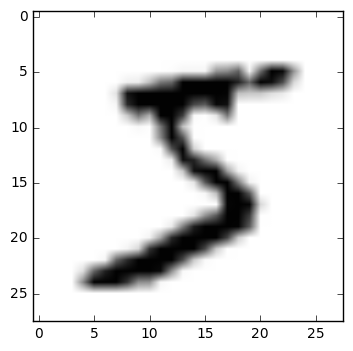

In [48]:
plt.imshow(x_train[0], cmap="Greys")

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

In [49]:
y_train[0]

5

In [19]:
len(neuron_list)

600

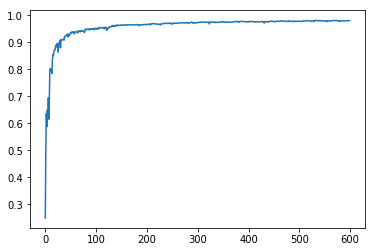

In [18]:
plt.plot(acc_list)

In [20]:
import pickle

In [28]:
with open('neurons.pickle', 'r+') as f:
    pickle.dump(neuron_list, f)

TypeError: write() argument must be str, not bytes

In [29]:
neuron_list[0]

[GraphableNeruon(weights=array([[[ 0.04885922,  0.12467428, -0.12467383],
         [ 0.02851254,  0.02811397, -0.08050238],
         [ 0.13408311, -0.08459224, -0.11106701]]], dtype=float32), bias=0.00034257898, layer=0, neuron_number=0, layer_type={'dtype': 'float32', 'use_bias': True, 'strides': (1, 1), 'dilation_rate': (1, 1), 'trainable': True, 'data_format': 'channels_last', 'kernel_regularizer': None, 'padding': 'valid', 'batch_input_shape': (None, 28, 28, 1), 'bias_regularizer': None, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'filters': 32, 'kernel_size': (3, 3), 'name': 'conv2d_7', 'activity_regularizer': None, 'bias_constraint': None, 'kernel_constraint': None, 'activation': 'relu', 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'distribution': 'uniform', 'seed': None, 'mode': 'fan_avg', 'scale': 1.0}}}),
 GraphableNeruon(weights=array([[[ 0.01507164,  0.0660271 ,  0.08590862],
         [ 0.08031062,  0.0589522 , -0.10438707],
         [-0.